In [1]:
# Fear Greed Index link:

# https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing
import gdown
file_id = '1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf'
url = f'https://drive.google.com/uc?id={file_id}'


output = 'D:\\ds_Gopal_Kumar\\csv_files\\Fear_Greed_Index.csv'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: D:\ds_Gopal_Kumar\csv_files\Fear_Greed_Index.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 585kB/s]


'D:\\ds_Gopal_Kumar\\csv_files\\Fear_Greed_Index.csv'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('D:\\ds_Gopal_Kumar\\csv_files\\Fear_Greed_Index.csv')

In [4]:
df.shape

(2644, 4)

In [5]:
df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [6]:
df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [7]:
df.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [8]:
df['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [9]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
df['date']= pd.to_datetime(df['date'],errors='coerce')

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


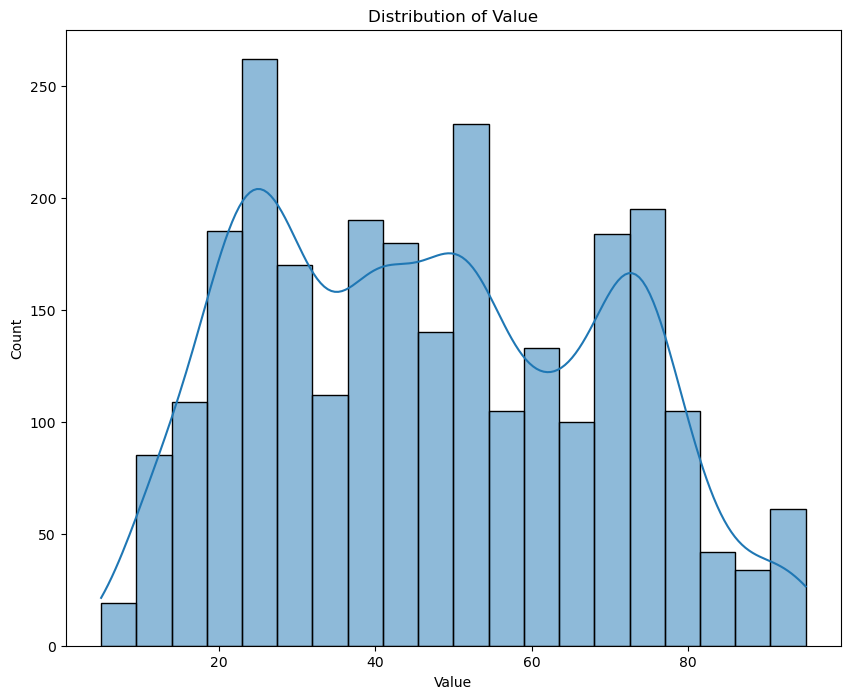

In [11]:
plt.figure(figsize=(10, 8))
sns.histplot(df['value'], bins=20, kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Distribution of value.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
plt.show()

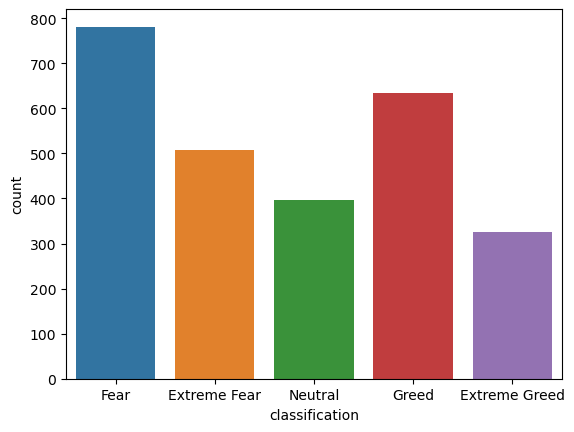

In [12]:
sns.countplot(x='classification', data= df)
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\count of classification.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')

In [13]:
df['year']= df['date'].dt.year
class_count = df.groupby(['year', 'classification']).size().reset_index(name='count')

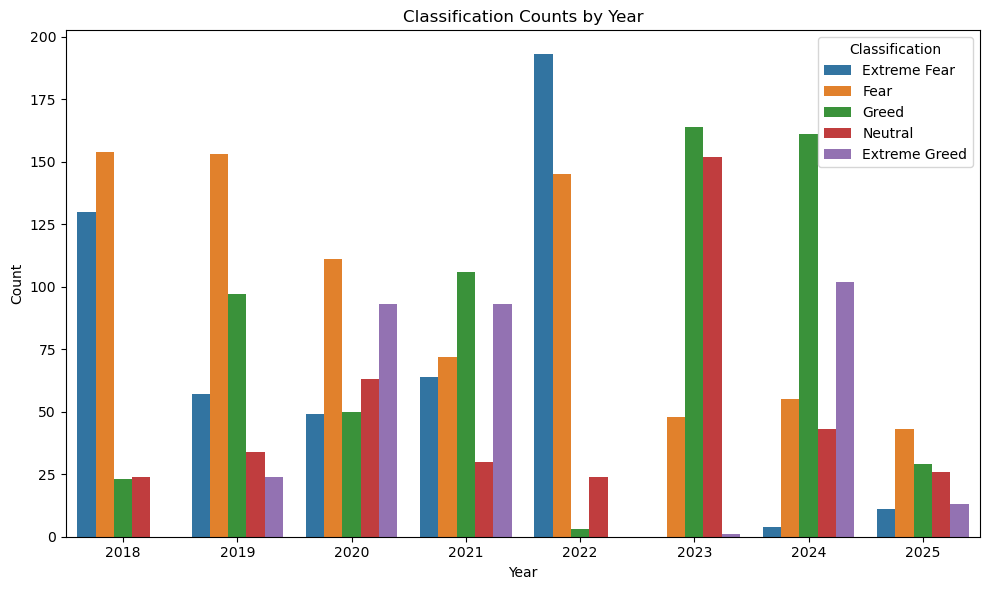

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=class_count, x='year', y='count', hue='classification')
plt.title('Classification Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Classification')
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Classification Counts by Year.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
plt.tight_layout()
plt.show()

In [15]:
df['month']= df['date'].dt.strftime('%B')
class_count = df.groupby(['month', 'classification']).size().reset_index(name='count')

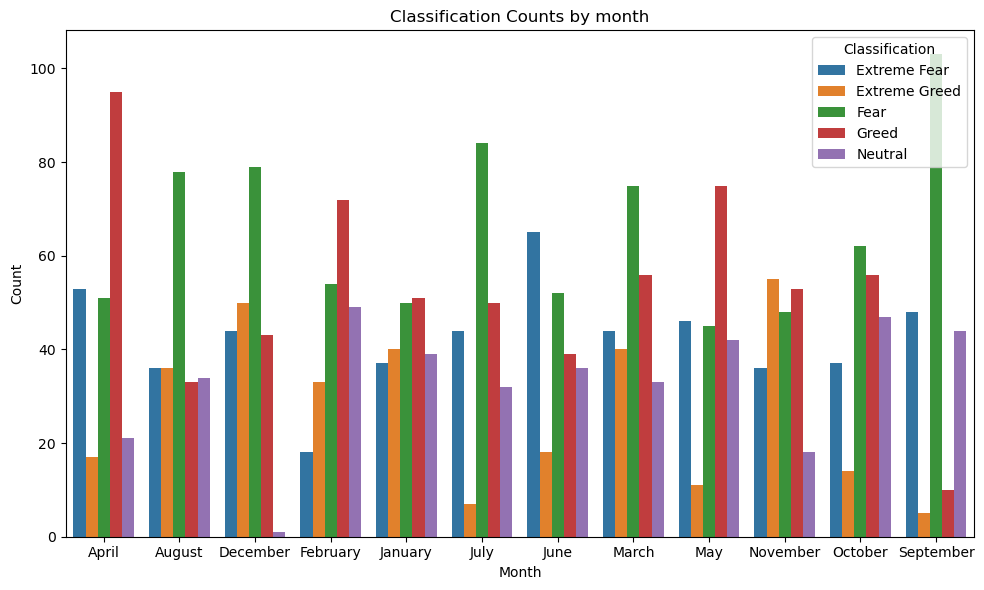

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=class_count, x='month', y='count', hue='classification')
plt.title('Classification Counts by month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Classification')
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Classification Counts by month.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
plt.tight_layout()
plt.show()

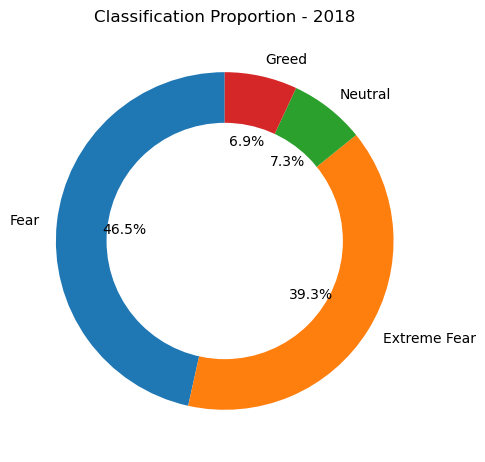

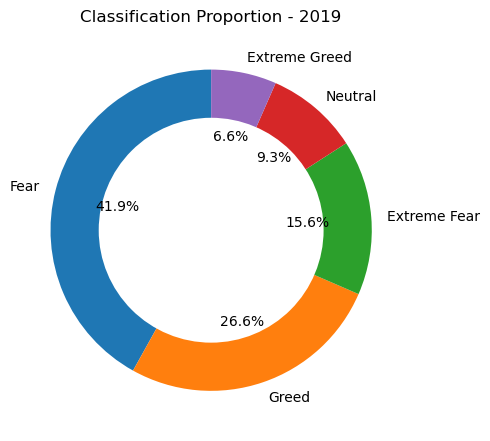

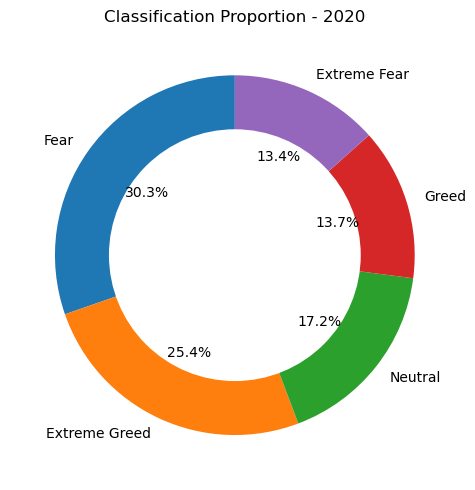

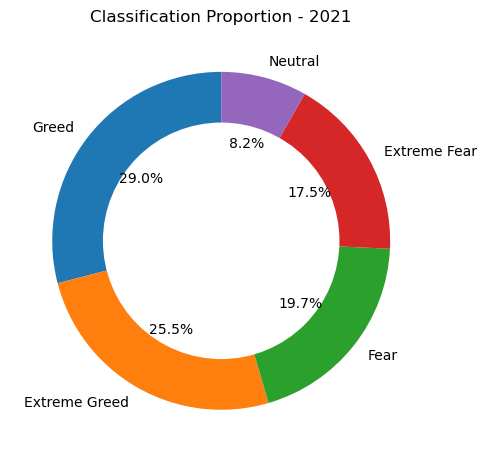

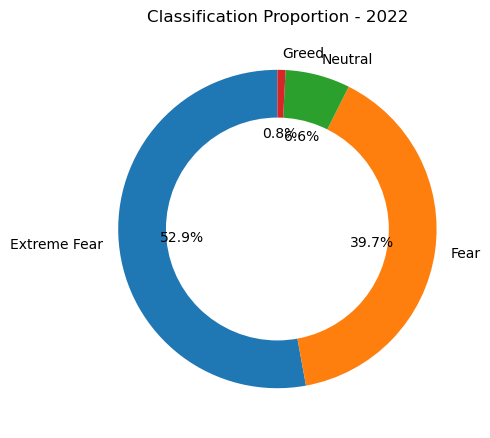

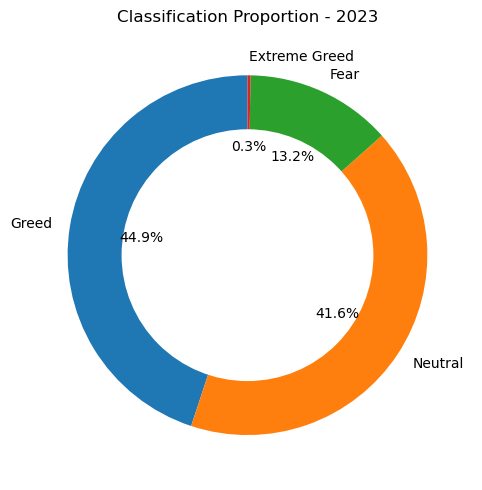

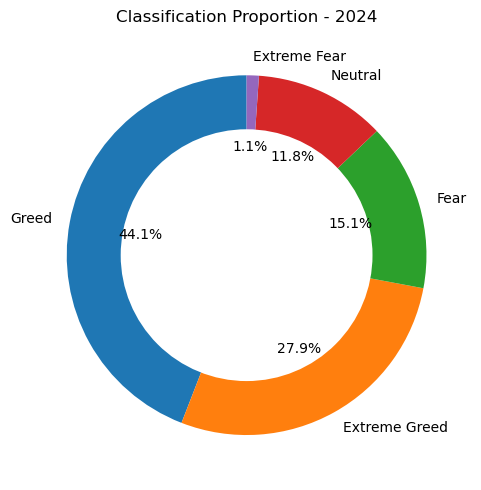

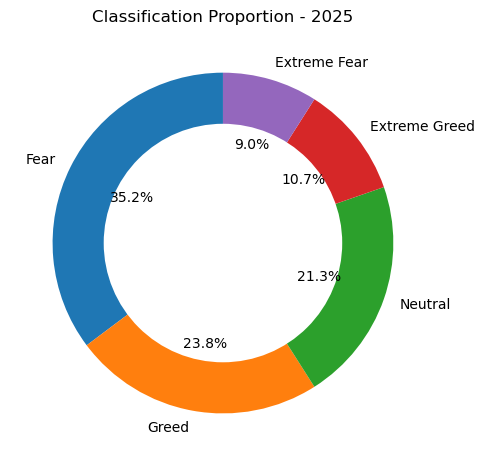

In [17]:
years = df['year'].unique()
for year in years:
    year_data = df[df['year'] == year]['classification'].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(year_data, labels=year_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Classification Proportion - {year}')
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(centre_circle)
    plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Classification Counts in Pie chart way.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
    plt.tight_layout()
    plt.show()

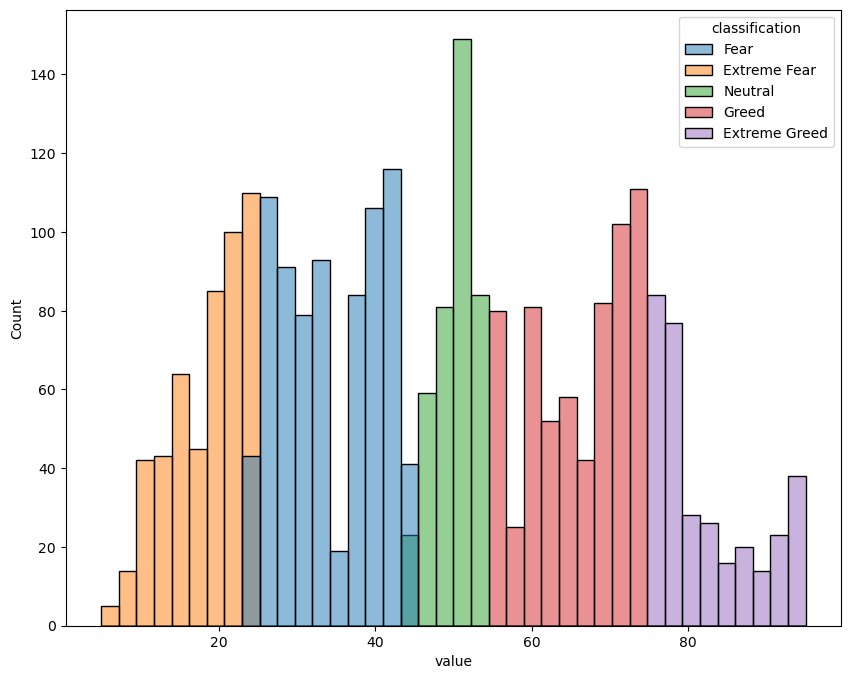

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(x='value', data= df,hue='classification', bins = 40)
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Hisplot of value with classification.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')